## Business Problem
- Create a predictive model, which can predict whether the person is diabetic or not.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df['Outcome'].unique()

array([1, 0], dtype=int64)

In [5]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
continuous = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
discrete_count = ['Pregnancies']
discrete_categorical = ['Outcome']

#### Exploratory Data Analysis

In [8]:
df[continuous].describe()

Glucose  BloodPressure  SkinThickness     Insulin         BMI  \
count  768.000000     768.000000     768.000000  768.000000  768.000000   
mean   120.894531      69.105469      20.536458   79.799479   31.992578   
std     31.972618      19.355807      15.952218  115.244002    7.884160   
min      0.000000       0.000000       0.000000    0.000000    0.000000   
25%     99.000000      62.000000       0.000000    0.000000   27.300000   
50%    117.000000      72.000000      23.000000   30.500000   32.000000   
75%    140.250000      80.000000      32.000000  127.250000   36.600000   
max    199.000000     122.000000      99.000000  846.000000   67.100000   

       DiabetesPedigreeFunction         Age  
count                768.000000  768.000000  
mean                   0.471876   33.240885  
std                    0.331329   11.760232  
min                    0.078000   21.000000  
25%                    0.243750   24.000000  
50%                    0.372500   29.000000  
75%                    0.626250   41.000000  
max                    2.420000   81.000000

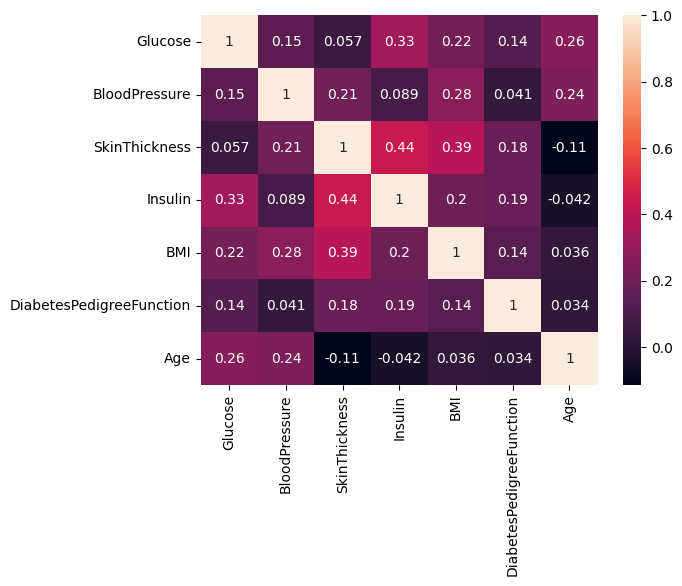

In [9]:
sns.heatmap(df[continuous].corr(), annot=True)
plt.show()

#### Data Cleaning

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Data Wrangling

In [11]:
# no encoding required

#### X & y

In [12]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

#### finding best random_state

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

Train = []
Test = []
CV = []

for i in range(0, 100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    model = LogisticRegression()
    model.fit(X_train, y_train)

    ypred_train = model.predict(X_train)
    ypred_test = model.predict(X_test)

    Train.append(model.score(X_train, y_train))
    # print('Train R2:', r2_score(y_train, ypred_train))
    Test.append(model.score(X_test, y_test))
    # print('Test R2:', r2_score(y_test, ypred_test))

    CV.append(cross_val_score(model, X_train, y_train, cv=5).mean())


em = pd.DataFrame({'Train':Train, 'Test':Test, 'CV':CV})
gm = em[(abs(em['Train']-em['Test']) <= 0.05) & (abs(em['Test']-em['CV']) <=0.05)]
print('best random state number:', gm[gm['Test']==gm['Test'].max()].index.to_list())

best random state number: [28]


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

- train size = 768 * 0.8 = 614 records
- test size = 768 * 0.2 = 154 records

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:, 1:8] = sc.fit_transform(X_train.iloc[:, 1:8])
X_test.iloc[:, 1:8] = sc.transform(X_test.iloc[:, 1:8])

we didn't apply scaling on Pregnancies column this is a count varaible also on the output variable because on output variable we don't apply scaling

## Modeling
# Logistic Regerssion (Baseline model)

In [16]:
# Modeling
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(penalty='l2')
model1.fit(X_train, y_train)

LogisticRegression()

## Evaluation
#### train and test

In [17]:
# prediction
ypred_train = model1.predict(X_train)
ypred_test = model1.predict(X_test)

# train accuracy
from sklearn.metrics import accuracy_score
print('Train Accuracy:', accuracy_score(y_train, ypred_train))

# CV Score
from sklearn.model_selection import cross_val_score
print('CV Score:', cross_val_score(model1, X_train, y_train, cv=5, scoring='accuracy').mean())

# test accuracy
print('Test Accuracy:', accuracy_score(y_test, ypred_test))

Train Accuracy: 0.7687296416938111
CV Score: 0.7671064907370384
Test Accuracy: 0.8116883116883117


#### ROC Curve

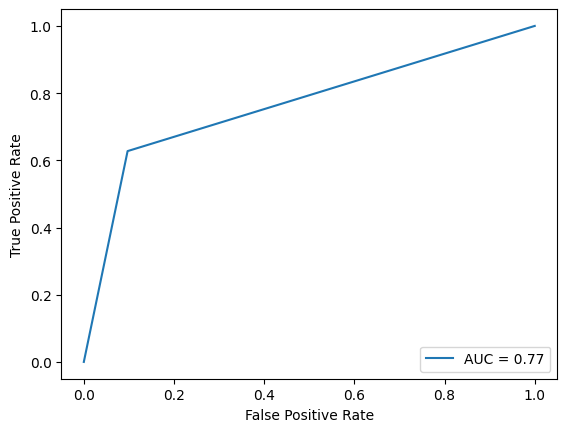

0.7651818008756901


In [18]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
fpr, tpr, thresolds = roc_curve(y_test, ypred_test)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.show()
print(roc_auc)

### Auc Score

In [19]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, ypred_test)

0.7651818008756901

#### Confusion matrix

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypred_test)
cm

array([[93, 10],
       [19, 32]], dtype=int64)

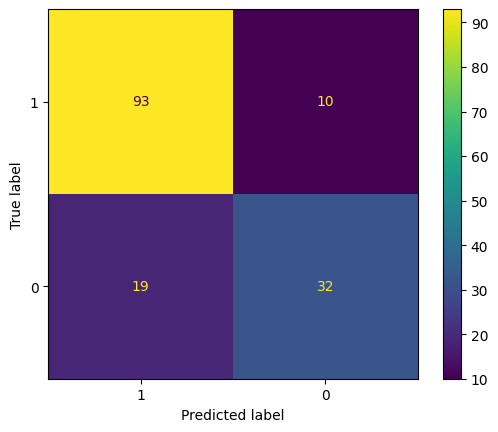

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm, display_labels=df['Outcome'].unique()).plot()
plt.show()

#### Classification Report

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       103
           1       0.76      0.63      0.69        51

    accuracy                           0.81       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.81      0.81      0.81       154



# KNN Model

### Choosing best K value
### Hyperparameter Tuning for KNN Classifier

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier()
param_grid = {'n_neighbors' : list(range(1, 31)), 'p':[1, 2]}

full_cv_classifier = GridSearchCV(estimator, param_grid, cv=5,scoring='accuracy')
full_cv_classifier.fit(X_train, y_train)
full_cv_classifier.best_params_

{'n_neighbors': 15, 'p': 1}

In [24]:
full_cv_classifier.best_estimator_

KNeighborsClassifier(n_neighbors=15, p=1)

In [25]:
full_cv_classifier.score(X_test, y_test)

0.7857142857142857

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=15, p=1)
knn_model.fit(X_train, y_train)

# Prediction
y_pred_train = knn_model.predict(X_train)
y_pred_test = knn_model.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn_model, X, y, cv=5)
print(scores)
print(scores.mean())

0.7752442996742671
0.7857142857142857
[0.75324675 0.72077922 0.76623377 0.83006536 0.7254902 ]
0.7591630591630592


In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_test)

array([[94,  9],
       [24, 27]], dtype=int64)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       103
           1       0.75      0.53      0.62        51

    accuracy                           0.79       154
   macro avg       0.77      0.72      0.74       154
weighted avg       0.78      0.79      0.77       154



# SVM Model

In [29]:
# modelling
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Prediction
ypred_train = svm_model.predict(X_train)
ypred_test = svm_model.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, ypred_train))
print(accuracy_score(y_test, ypred_test))

0.7768729641693811
0.7922077922077922


### Hyperparameter tuning

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
estimator = SVC()
param_grid = {'C' : [0.01, 0.1, 1, 10, 100], 'kernel':['rbf', 'linear',  'poly', 'signoid']}

full_cv_classifier = GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
full_cv_classifier.fit(X_train, y_train)
full_cv_classifier.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [31]:
# modelling
from sklearn.svm import SVC
svm_model2 = SVC(C=0.01, kernel='linear')
svm_model2.fit(X_train, y_train)

# Prediction
ypred_train = svm_model2.predict(X_train)
ypred_test = svm_model2.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, ypred_train))
print(accuracy_score(y_test, ypred_test))

0.7719869706840391
0.7922077922077922


# DecisionTree Model
#### Decision tree classifier - with default hyperparameters

In [34]:
# Modelling
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier()
dt_default.fit(X_train, y_train)

# Prediction
ypred_train = dt_default.predict(X_train)

# Evaluation
from sklearn.metrics import accuracy_score
print('Train accuracy:', accuracy_score(ypred_train, y_train))

from sklearn.model_selection import cross_val_score
print('Cross Validation:', cross_val_score(dt_default, X, y, cv=5).mean())

ypred_test = dt_default.predict(X_test)
print('Test accuracy:', accuracy_score(ypred_test, y_test))


Train accuracy: 1.0
Cross Validation: 0.7097275273745862
Test accuracy: 0.6883116883116883


In [46]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

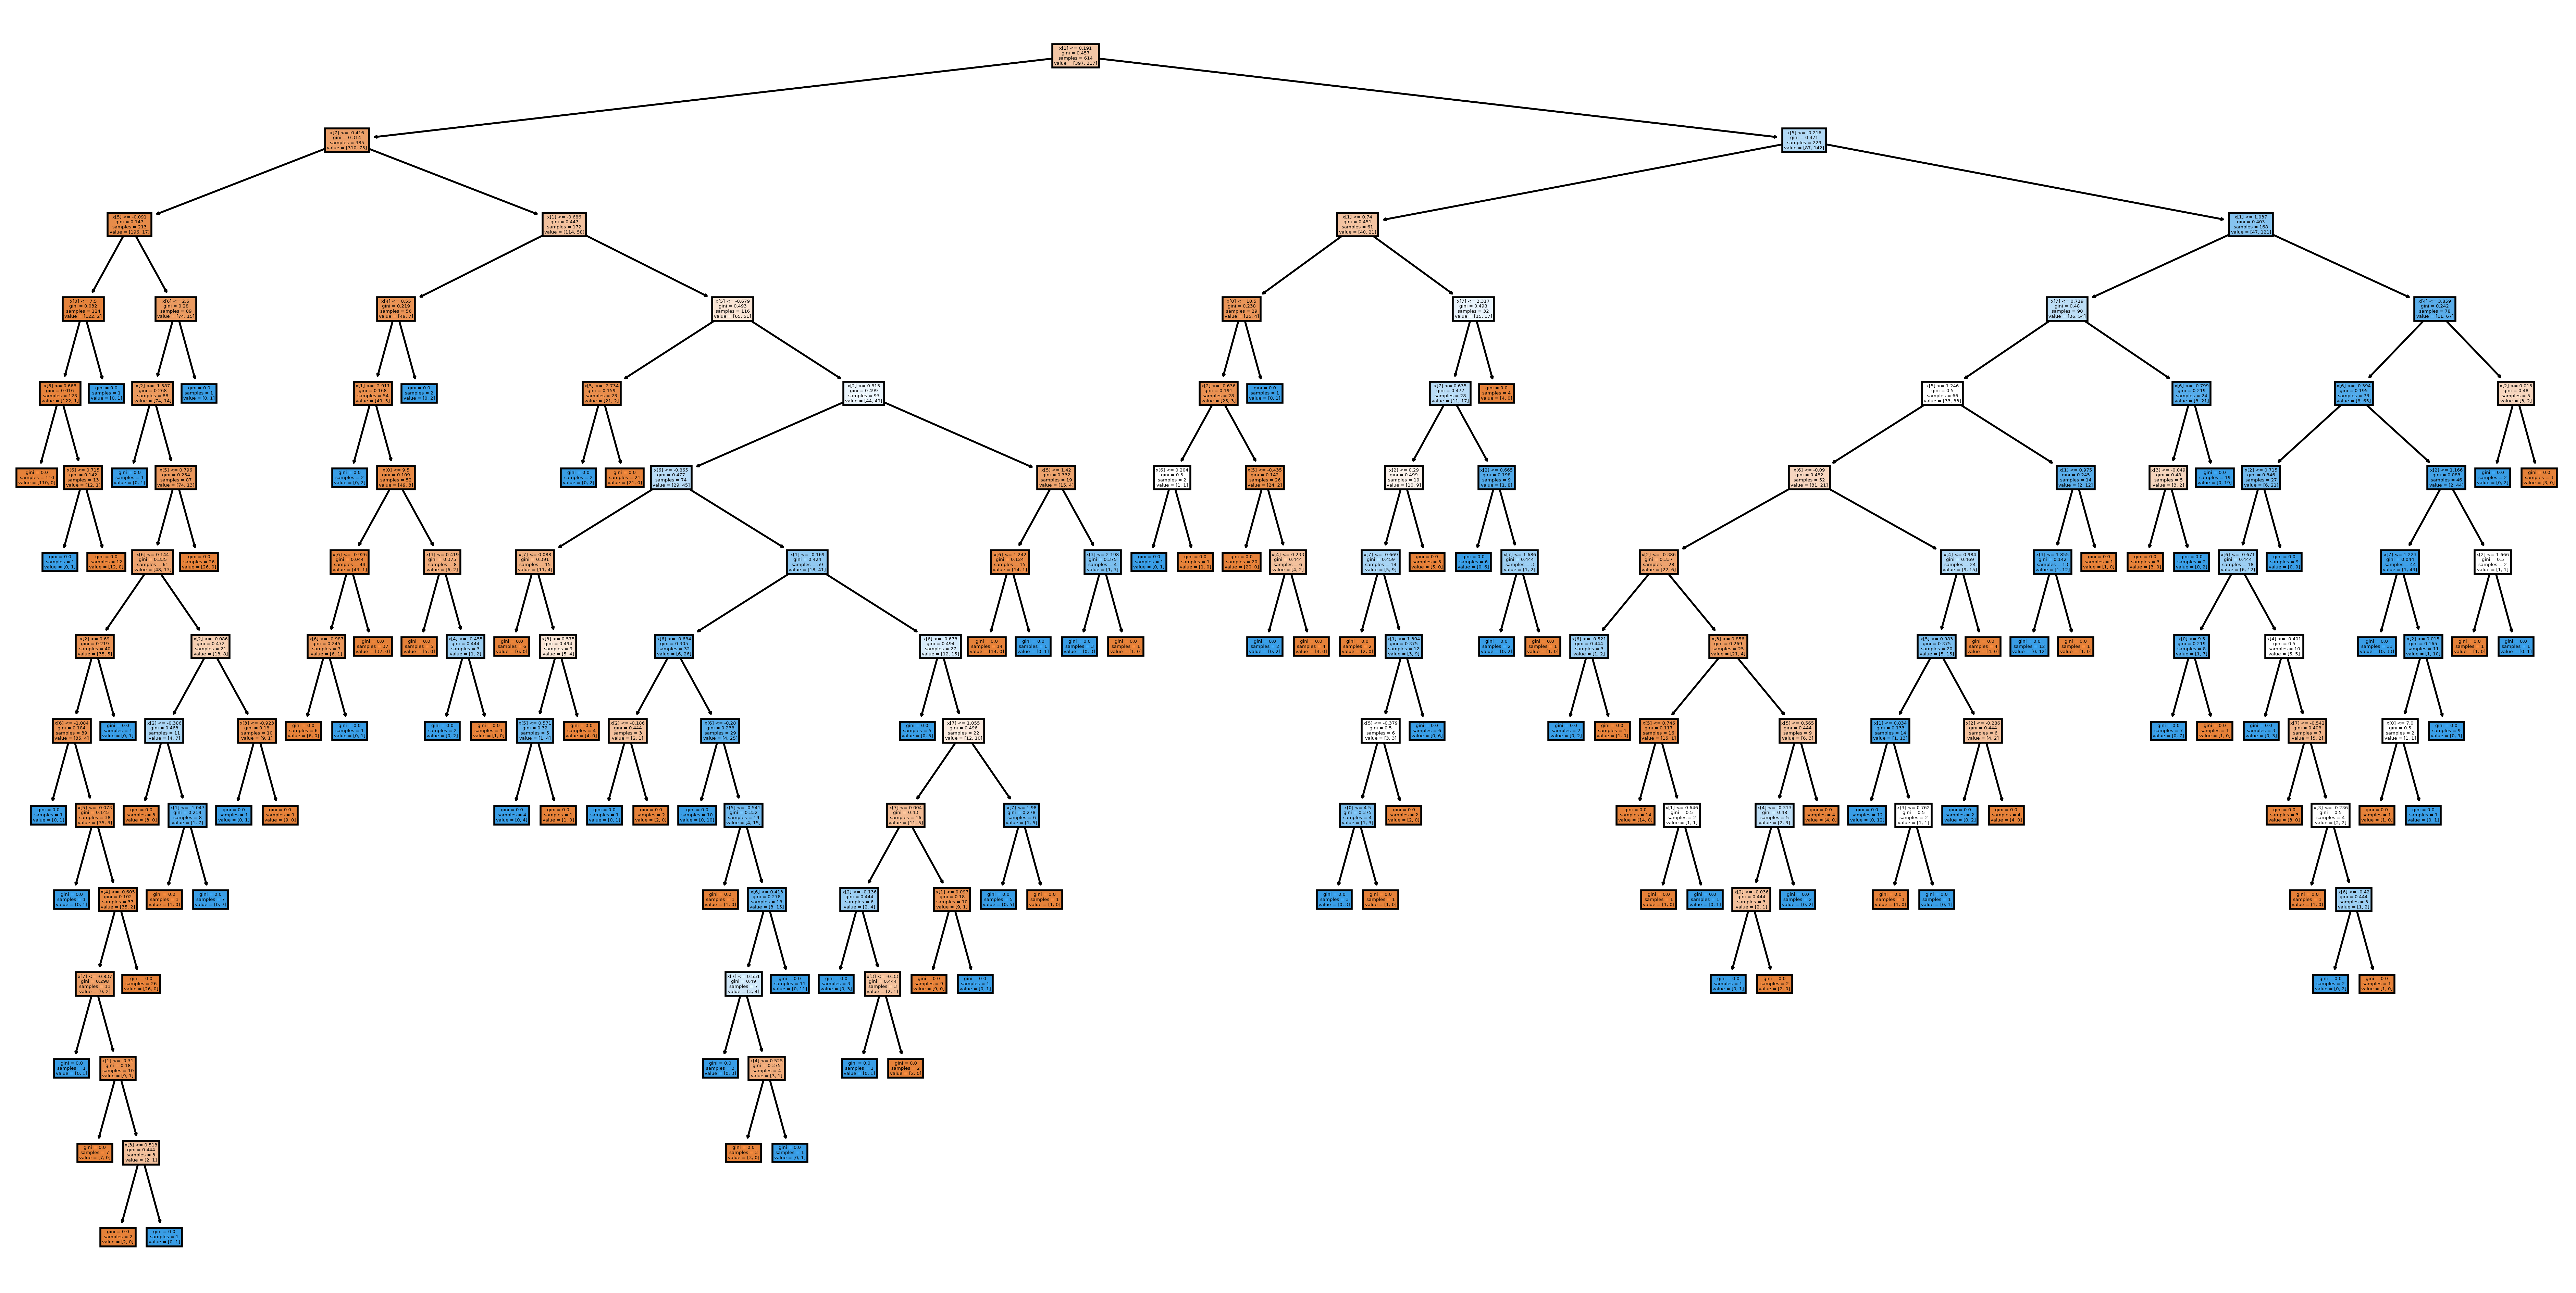

In [49]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24, 12), dpi=400)
plot_tree(dt_default, filled=True)
plt.show()

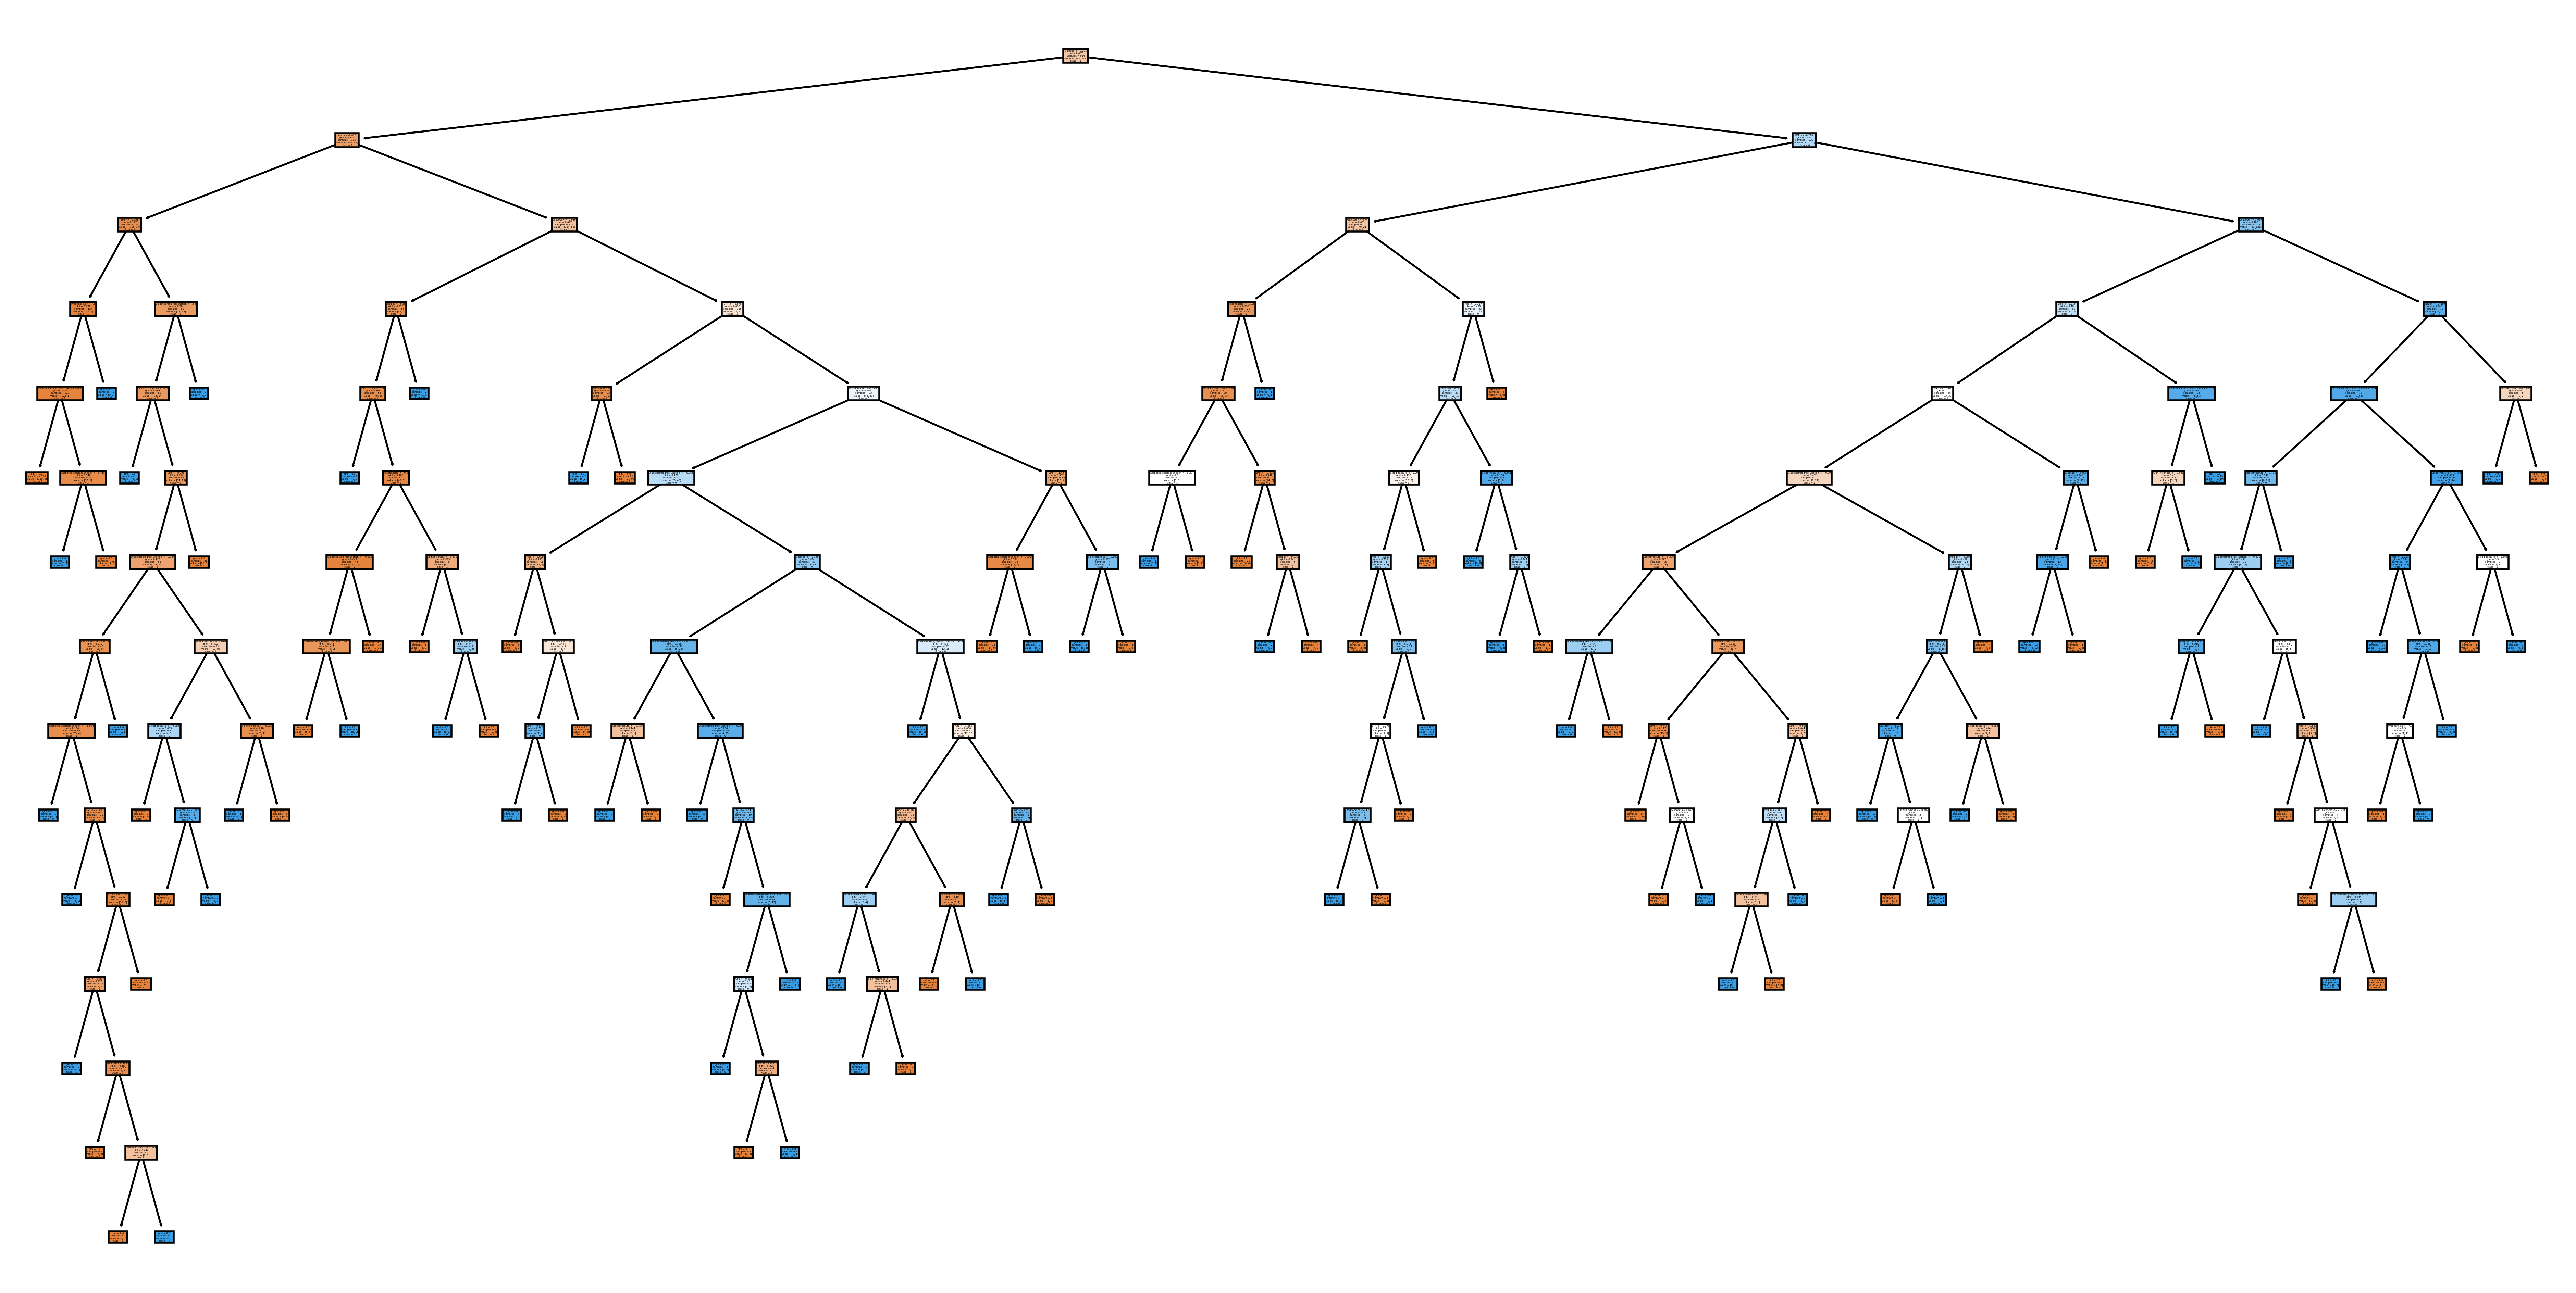

In [47]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24, 12), dpi=400)
plot_tree(dt_default, filled=True, feature_names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'], class_names=['1', '0'])
plt.show()

### Hyperparameter Tuning for Decision Tree Clssifier

In [57]:
from sklearn.model_selection import GridSearchCV

# model
estimator = DecisionTreeClassifier(random_state=0)

# parameters (which you want to tune and identify the best)
param_grid = {'criterion':['gini', 'entropy'],
             'max_depth':[1, 2, 3, 4, 5]}

grid = GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
grid.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [58]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

#### Importance of each feature given by this model

In [65]:
data = grid.best_estimator_.feature_importances_
feats = pd.DataFrame(data, index=X.columns, columns=['Feature Importance'])
feats

Feature Importance
Pregnancies                         0.000000
Glucose                             0.598433
BloodPressure                       0.000000
SkinThickness                       0.000000
Insulin                             0.000000
BMI                                 0.234907
DiabetesPedigreeFunction            0.000000
Age                                 0.166660

In [67]:
feats_imp = feats[feats['Feature Importance']>0]
feats_imp

Feature Importance
Glucose            0.598433
BMI                0.234907
Age                0.166660

In [69]:
important_features_list = feats_imp.index.to_list()
important_features_list

['Glucose', 'BMI', 'Age']

## Final DecisionTree Model
#### with best hyperparameter & with important features

In [73]:
# input with important features
X_imp = X[important_features_list]

# train-test-split
X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size=0.2, random_state=6)

# Model with best hyperparameters
final_dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
final_dt_model.fit(X_train, y_train)

ypred_train = final_dt_model.predict(X_train)
ypred_test = final_dt_model.predict(X_test)

# Evaluation
print('Train accuracy:', accuracy_score(ypred_train, y_train))
print('Test accuracy:', accuracy_score(ypred_test, y_test))
print('Cross Validation Score:', cross_val_score(final_dt_model, X_imp, y, cv=5).mean())

Train accuracy: 0.7671009771986971
Test accuracy: 0.7532467532467533
Cross Validation Score: 0.7396400984636278


In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, ypred_test)

array([[91, 12],
       [23, 28]], dtype=int64)

>
# PROPER DATA CLEANING FOR THE BEST MODEL

### As we know our business reuqirement is 85% but we are getting 81 so we need to work on the proper data cleaning 

In [32]:
df.head(2)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0

in this dataset, I observed some problems like BloodPressure = '0', skinthickness also = '0' so that basically means these are outliers and I need to handle them

In [33]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#### Checking and handling outliers

##### 'Pregnancies'

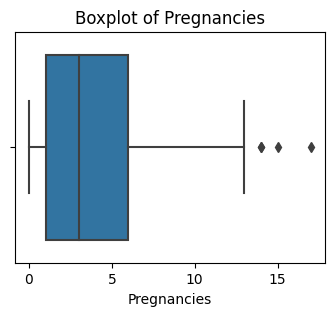

In [34]:
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['Pregnancies'])
plt.title('Boxplot of Pregnancies')
plt.show()

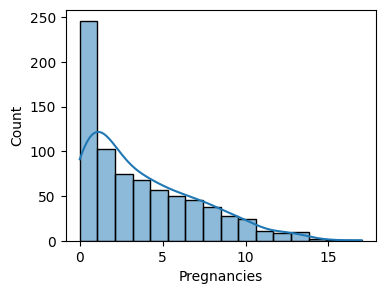

In [35]:
plt.figure(figsize=(4, 3))
sns.histplot(df['Pregnancies'], kde=True)
plt.show()

if any female is not pregnant so, we can't replace it with upper and lower limit so we need to drop outliers

In [36]:
Q1 = df['Pregnancies'].quantile(0.25)
Q3 = df['Pregnancies'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - (IQR * 1.5)
upper_limit = Q3 + (IQR * 1.5)
df[(df['Pregnancies'] < lower_limit) | (df['Pregnancies'] > upper_limit)]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
88            15      136             70             32      110  37.1   
159           17      163             72             41      114  40.9   
298           14      100             78             25      184  36.6   
455           14      175             62             30        0  33.6   

     DiabetesPedigreeFunction  Age  Outcome  
88                      0.153   43        1  
159                     0.817   47        1  
298                     0.412   46        1  
455                     0.212   38        1

In [37]:
df['Pregnancies'].nunique()

17

In [38]:
# df.drop(index=[88, 159, 298, 455], inplace=True)
df = df.drop(index=[88, 159, 298, 455])

In [39]:
df['Pregnancies'].nunique()

14

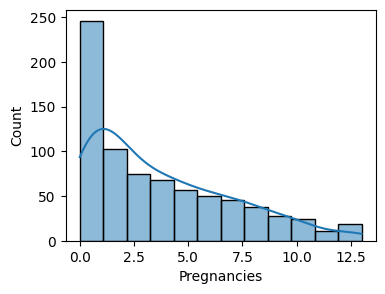

In [40]:
plt.figure(figsize=(4, 3))
sns.histplot(df['Pregnancies'], kde=True)
plt.show()

##### 'Glucose'

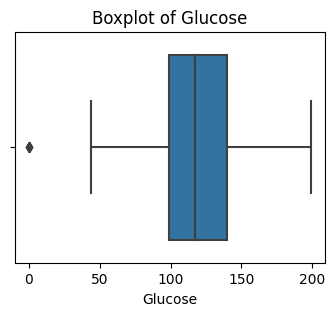

In [41]:
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['Glucose'])
plt.title('Boxplot of Glucose')
plt.show()

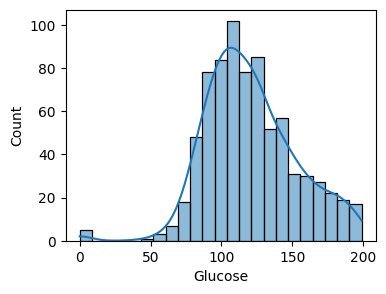

In [42]:
plt.figure(figsize=(4, 3))
sns.histplot(df['Glucose'], kde=True)
plt.show()

In [43]:
Q1 = df['Glucose'].quantile(0.25)
Q3 = df['Glucose'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - (IQR * 1.5)
upper_limit = Q3 + (IQR * 1.5)
df[(df['Glucose'] < lower_limit) | (df['Glucose'] > upper_limit)]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
75             1        0             48             20        0  24.7   
182            1        0             74             20       23  27.7   
342            1        0             68             35        0  32.0   
349            5        0             80             32        0  41.0   
502            6        0             68             41        0  39.0   

     DiabetesPedigreeFunction  Age  Outcome  
75                      0.140   22        0  
182                     0.299   21        0  
342                     0.389   22        0  
349                     0.346   37        1  
502                     0.727   41        1

In [44]:
df['Glucose'].nunique()

136

In [45]:
# df.drop(index=[75, 182, 342, 349, 502], inplace=True)
df = df.drop(index=[75, 182, 342, 349, 502])

In [46]:
df['Glucose'].nunique()

135

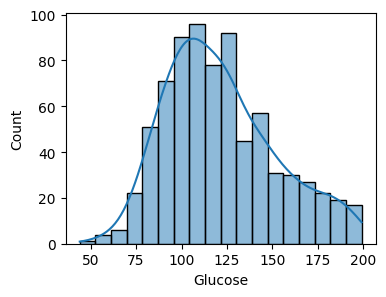

In [47]:
plt.figure(figsize=(4, 3))
sns.histplot(df['Glucose'], kde=True)
plt.show()

##### BloodPressure

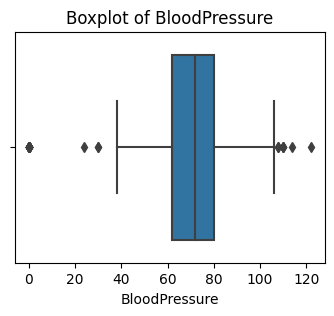

In [48]:
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['BloodPressure'])
plt.title('Boxplot of BloodPressure')
plt.show()

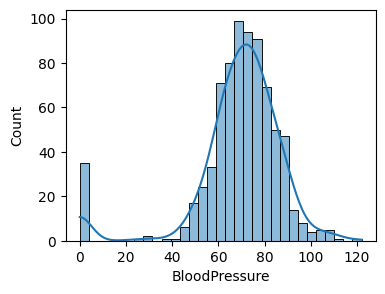

In [49]:
plt.figure(figsize=(4, 3))
sns.histplot(df['BloodPressure'], kde=True)
plt.show()

In [50]:
sorted(df['BloodPressure'].unique().tolist())

[0,
 24,
 30,
 38,
 40,
 44,
 46,
 48,
 50,
 52,
 54,
 55,
 56,
 58,
 60,
 61,
 62,
 64,
 65,
 66,
 68,
 70,
 72,
 74,
 75,
 76,
 78,
 80,
 82,
 84,
 85,
 86,
 88,
 90,
 92,
 94,
 95,
 96,
 98,
 100,
 102,
 104,
 106,
 108,
 110,
 114,
 122]

In [51]:
Q1 = df['BloodPressure'].quantile(0.25)
Q3 = df['BloodPressure'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - (IQR * 1.5)
print('lower_limit:', lower_limit)
print('upper_limit:', upper_limit)
upper_limit = Q3 + (IQR * 1.5)
df[(df['BloodPressure'] < lower_limit) | (df['BloodPressure'] > upper_limit)]

lower_limit: 35.0
upper_limit: 201.5


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
7             10      115              0              0        0  35.3   
15             7      100              0              0        0  30.0   
18             1      103             30             38       83  43.3   
43             9      171            110             24      240  45.4   
49             7      105              0              0        0   0.0   
60             2       84              0              0        0   0.0   
78             0      131              0              0        0  43.2   
81             2       74              0              0        0   0.0   
84             5      137            108              0        0  48.8   
106            1       96            122              0        0  22.4   
125            1       88             30             42       99  55.0   
172            2       87              0             23        0  28.9   
177            0      129            110             46      130  67.1   
193           11      135              0              0        0  52.3   
222            7      119              0              0        0  25.2   
261            3      141              0              0        0  30.0   
266            0      138              0              0        0  36.3   
269            2      146              0              0        0  27.5   
300            0      167              0              0        0  32.3   
332            1      180              0              0        0  43.3   
336            0      117              0              0        0  33.8   
347            3      116              0              0        0  23.5   
357           13      129              0             30        0  39.9   
362            5      103            108             37        0  39.2   
426            0       94              0              0        0   0.0   
430            2       99              0              0        0  22.2   
435            0      141              0              0        0  42.4   
453            2      119              0              0        0  19.6   
468            8      120              0              0        0  30.0   
484            0      145              0              0        0  44.2   
494            3       80              0              0        0   0.0   
522            6      114              0              0        0   0.0   
533            6       91              0              0        0  29.8   
535            4      132              0              0        0  32.9   
549            4      189            110             31        0  28.5   
589            0       73              0              0        0  21.1   
597            1       89             24             19       25  27.8   
601            6       96              0              0        0  23.7   
604            4      183              0              0        0  28.4   
619            0      119              0              0        0  32.4   
643            4       90              0              0        0  28.0   
691           13      158            114              0        0  42.3   
697            0       99              0              0        0  25.0   
703            2      129              0              0        0  38.5   
706           10      115              0              0        0   0.0   

     DiabetesPedigreeFunction  Age  Outcome  
7                       0.134   29        0  
15                      0.484   32        1  
18                      0.183   33        0  
43                      0.721   54        1  
49                      0.305   24        0  
60                      0.304   21        0  
78                      0.270   26        1  
81                      0.102   22        0  
84                      0.227   37        1  
106                     0.207   27        0  
125                     0.496   26        1  
172                     0.773   25        0  
17

In [52]:
a = df[(df['BloodPressure'] < lower_limit) | (df['BloodPressure'] > upper_limit)]
a.sort_values(by='BloodPressure')

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
7             10      115              0              0        0  35.3   
703            2      129              0              0        0  38.5   
426            0       94              0              0        0   0.0   
430            2       99              0              0        0  22.2   
435            0      141              0              0        0  42.4   
453            2      119              0              0        0  19.6   
468            8      120              0              0        0  30.0   
484            0      145              0              0        0  44.2   
494            3       80              0              0        0   0.0   
522            6      114              0              0        0   0.0   
533            6       91              0              0        0  29.8   
535            4      132              0              0        0  32.9   
589            0       73              0              0        0  21.1   
601            6       96              0              0        0  23.7   
604            4      183              0              0        0  28.4   
619            0      119              0              0        0  32.4   
643            4       90              0              0        0  28.0   
697            0       99              0              0        0  25.0   
347            3      116              0              0        0  23.5   
336            0      117              0              0        0  33.8   
357           13      129              0             30        0  39.9   
300            0      167              0              0        0  32.3   
15             7      100              0              0        0  30.0   
49             7      105              0              0        0   0.0   
60             2       84              0              0        0   0.0   
78             0      131              0              0        0  43.2   
81             2       74              0              0        0   0.0   
332            1      180              0              0        0  43.3   
172            2       87              0             23        0  28.9   
706           10      115              0              0        0   0.0   
193           11      135              0              0        0  52.3   
222            7      119              0              0        0  25.2   
261            3      141              0              0        0  30.0   
266            0      138              0              0        0  36.3   
269            2      146              0              0        0  27.5   
597            1       89             24             19       25  27.8   
125            1       88             30             42       99  55.0   
18             1      103             30             38       83  43.3   
362            5      103            108             37        0  39.2   
84             5      137            108              0        0  48.8   
549            4      189            110             31        0  28.5   
43             9      171            110             24      240  45.4   
177            0      129            110             46      130  67.1   
691           13      158            114              0        0  42.3   
106            1       96            122              0        0  22.4   

     DiabetesPedigreeFunction  Age  Outcome  
7                       0.134   29        0  
703                     0.304   41        0  
426                     0.256   25        0  
430                     0.108   23        0  
435                     0.205   29        1  
453                     0.832   72        0  
468                     0.183   38        1  
484                     0.630   31        1  
494                     0.174   22        0  
522                     0.189   26        0  
533                     0.501   31        0  
535                     0.302   23        1  
58

In [53]:
df['BloodPressure'] = df['BloodPressure'].clip(lower=35, upper=107)

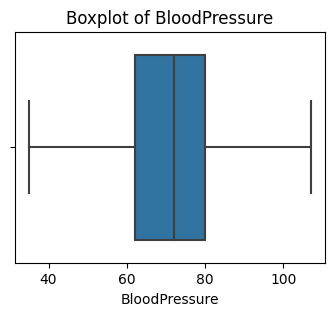

In [54]:
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['BloodPressure'])
plt.title('Boxplot of BloodPressure')
plt.show()

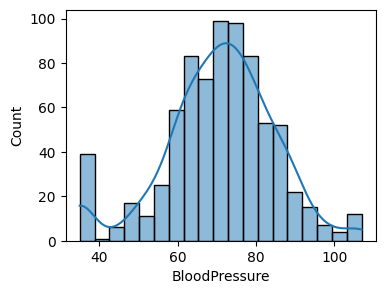

In [55]:
plt.figure(figsize=(4, 3))
sns.histplot(df['BloodPressure'], kde=True)
plt.show()

##### SkinThickness

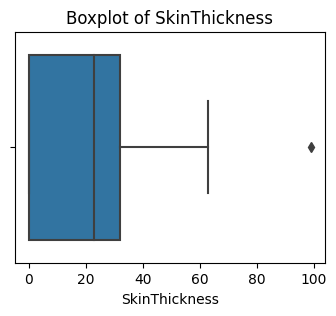

In [56]:
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['SkinThickness'])
plt.title('Boxplot of SkinThickness')
plt.show()

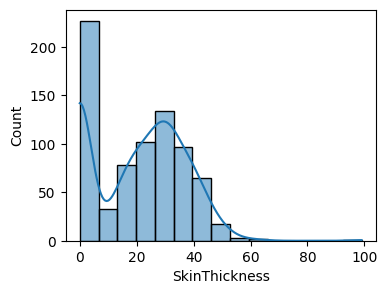

In [57]:
plt.figure(figsize=(4, 3))
sns.histplot(df['SkinThickness'], kde=True)
plt.show()

In [58]:
Q1 = df['SkinThickness'].quantile(0.25)
Q3 = df['SkinThickness'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - (IQR * 1.5)
print('lower_limit:', lower_limit)
print('upper_limit:', upper_limit)
upper_limit = Q3 + (IQR * 1.5)
df[(df['SkinThickness'] < lower_limit) | (df['SkinThickness'] > upper_limit)]

lower_limit: -48.0
upper_limit: 107.0


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
579            2      197             70             99        0  34.7   

     DiabetesPedigreeFunction  Age  Outcome  
579                     0.575   62        1

In [59]:
# df.drop(index=[579], inplace=True)
df = df.drop(index=[579])

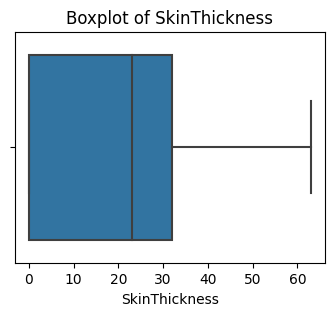

In [60]:
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['SkinThickness'])
plt.title('Boxplot of SkinThickness')
plt.show()

In [61]:
len(df[df['SkinThickness'] == 0])

227

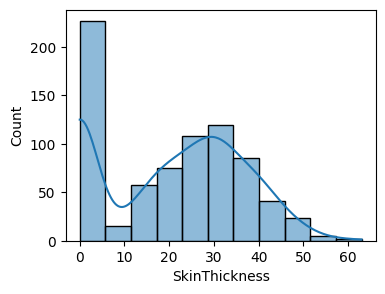

In [62]:
plt.figure(figsize=(4, 3))
sns.histplot(df['SkinThickness'], kde=True)
plt.show()

there are 227 records are there where skinthickness = 0 so, it's not possible to remove all 227 records, or we can't retrain because this is the wrong data so, it's better ti replace statistically use measure of central tendency (mean, median, mode).

In [63]:
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72           35.0        0  33.6   
1            1       85             66           29.0        0  26.6   
2            8      183             64            NaN        0  23.3   
3            1       89             66           23.0       94  28.1   
4            0      137             40           35.0      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [64]:
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace=True)
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72           35.0        0  33.6   
1            1       85             66           29.0        0  26.6   
2            8      183             64           29.0        0  23.3   
3            1       89             66           23.0       94  28.1   
4            0      137             40           35.0      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [65]:
len(df[df['SkinThickness'] == 0])

0

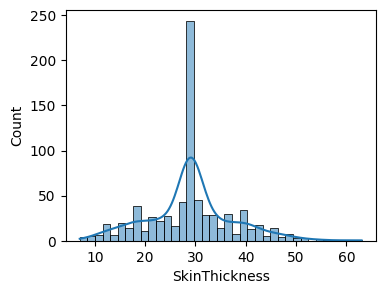

In [66]:
plt.figure(figsize=(4, 3))
sns.histplot(df['SkinThickness'], kde=True)
plt.show()

##### Insulin

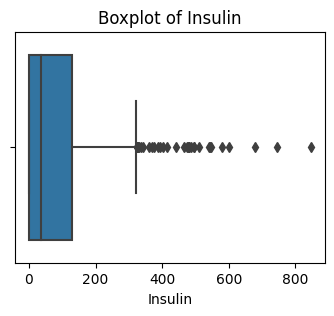

In [67]:
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['Insulin'])
plt.title('Boxplot of Insulin')
plt.show()

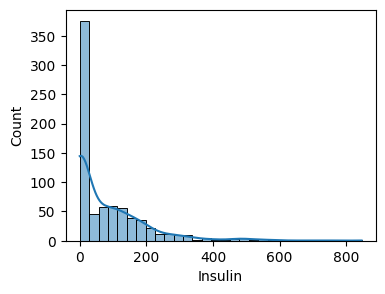

In [68]:
plt.figure(figsize=(4, 3))
sns.histplot(df['Insulin'], kde=True)
plt.show()

In [69]:
Q1 = df['Insulin'].quantile(0.25)
Q3 = df['Insulin'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - (IQR * 1.5)
print('lower_limit:', lower_limit)
print('upper_limit:', upper_limit)
upper_limit = Q3 + (IQR * 1.5)
print(len(df[(df['Insulin'] < lower_limit) | (df['Insulin'] > upper_limit)]))
df[(df['Insulin'] < lower_limit) | (df['Insulin'] > upper_limit)]

lower_limit: -193.125
upper_limit: 80.0
33


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
8              2      197             70           45.0      543  30.5   
13             1      189             60           23.0      846  30.1   
54             7      150             66           42.0      342  34.7   
111            8      155             62           26.0      495  34.0   
139            5      105             72           29.0      325  36.9   
153            1      153             82           42.0      485  40.6   
186            8      181             68           36.0      495  30.1   
220            0      177             60           29.0      478  34.6   
228            4      197             70           39.0      744  36.7   
231            6      134             80           37.0      370  46.2   
247            0      165             90           33.0      680  52.3   
248            9      124             70           33.0      402  35.4   
258            1      193             50           16.0      375  25.9   
286            5      155             84           44.0      545  38.7   
296            2      146             70           38.0      360  28.0   
360            5      189             64           33.0      325  31.2   
370            3      173             82           48.0      465  38.4   
375           12      140             82           43.0      325  39.2   
392            1      131             64           14.0      415  23.7   
409            1      172             68           49.0      579  42.4   
415            3      173             84           33.0      474  35.7   
480            3      158             70           30.0      328  35.5   
486            1      139             62           41.0      480  40.7   
519            6      129             90            7.0      326  19.6   
574            1      143             86           30.0      330  30.1   
584            8      124             76           24.0      600  28.7   
645            2      157             74           35.0      440  39.4   
655            2      155             52           27.0      540  38.7   
695            7      142             90           24.0      480  30.4   
707            2      127             46           21.0      335  34.4   
710            3      158             64           13.0      387  31.2   
715            7      187             50           33.0      392  33.9   
753            0      181             88           44.0      510  43.3   

     DiabetesPedigreeFunction  Age  Outcome  
8                       0.158   53        1  
13                      0.398   59        1  
54                      0.718   42        0  
111                     0.543   46        1  
139                     0.159   28        0  
153                     0.687   23        0  
186                     0.615   60        1  
220                     1.072   21        1  
228                     2.329   31        0  
231                     0.238   46        1  
247                     0.427   23        0  
248                     0.282   34        0  
258                     0.655   24        0  
286                     0.619   34        0  
296                     0.337   29        1  
360                     0.583   29        1  
370                     2.137   25        1  
375                     0.528   58        1  
392                     0.389   21        0  
409                     0.702   28        1  
415                     0.258   22        1  
480                     0.344   35        1  
486                     0.536   21        0  
519                     0.582   60        0  
574                     0.892   23        0  
584                     0.687   52        1  
645                     0.134   30        0  
655                     0.240   25        1  
695                     0.128   43        1  
707                     0.176   22        0  
710                     0.295   24        0  
715             

In [70]:
df['Insulin'].unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 105, 285, 156,
        78, 130,  55,  58, 114, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215,  42,
       132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73, 108,
        43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81, 196,
       415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95, 237,
       191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65, 166,
       274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15, 183,
        91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 392, 17

In [71]:
len(sorted(df['Insulin'].unique()))

185

In [72]:
df['Insulin'] = df['Insulin'].clip(lower=-193.125, upper=80)

In [73]:
df['Insulin'].unique()

array([ 0, 80, 54, 70, 36, 23, 38, 71, 48, 64, 76, 40, 18, 37, 51, 49, 50,
       63, 53, 78, 55, 58, 44, 56, 32, 45, 67, 57, 75, 74, 42, 29, 68, 52,
       73, 43, 66, 72, 59, 61, 60, 14, 79, 65, 77, 25, 41, 15, 46, 22, 16],
      dtype=int64)

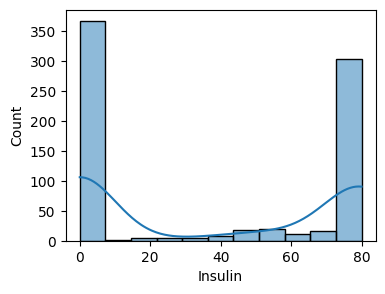

In [74]:
plt.figure(figsize=(4, 3))
sns.histplot(df['Insulin'], kde=True)
plt.show()

In [75]:
df[df['Insulin'] == 0]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72           35.0        0  33.6   
1              1       85             66           29.0        0  26.6   
2              8      183             64           29.0        0  23.3   
5              5      116             74           29.0        0  25.6   
7             10      115             35           29.0        0  35.3   
..           ...      ...            ...            ...      ...   ...   
761            9      170             74           31.0        0  44.0   
762            9       89             62           29.0        0  22.5   
764            2      122             70           27.0        0  36.8   
766            1      126             60           29.0        0  30.1   
767            1       93             70           31.0        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
5                       0.201   30        0  
7                       0.134   29        0  
..                        ...  ...      ...  
761                     0.403   43        1  
762                     0.142   33        0  
764                     0.340   27        0  
766                     0.349   47        1  
767                     0.315   23        0  

[368 rows x 9 columns]

In [76]:
df['Insulin'].replace(0, df['Insulin'].mean(), inplace=True)

In [77]:
df[df['Insulin'] == 0]

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

##### BMI

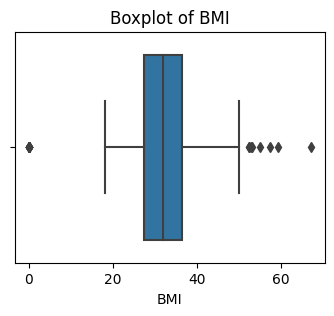

In [78]:
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['BMI'])
plt.title('Boxplot of BMI')
plt.show()

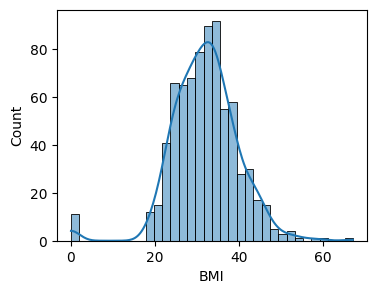

In [79]:
plt.figure(figsize=(4, 3))
sns.histplot(df['BMI'], kde=True)
plt.show()

In [80]:
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - (IQR * 1.5)
print('lower_limit:', lower_limit)
print('upper_limit:', upper_limit)
upper_limit = Q3 + (IQR * 1.5)
print(len(df[(df['BMI'] < lower_limit) | (df['BMI'] > upper_limit)]))
df[(df['BMI'] < lower_limit) | (df['BMI'] > upper_limit)]

lower_limit: 13.500000000000002
upper_limit: 321.875
19


Pregnancies  Glucose  BloodPressure  SkinThickness    Insulin   BMI  \
9              8      125             96           29.0  37.771768   0.0   
49             7      105             35           29.0  37.771768   0.0   
60             2       84             35           29.0  37.771768   0.0   
81             2       74             35           29.0  37.771768   0.0   
120            0      162             76           56.0  80.000000  53.2   
125            1       88             35           42.0  80.000000  55.0   
145            0      102             75           23.0  37.771768   0.0   
177            0      129            107           46.0  80.000000  67.1   
193           11      135             35           29.0  37.771768  52.3   
247            0      165             90           33.0  80.000000  52.3   
303            5      115             98           29.0  37.771768  52.9   
371            0      118             64           23.0  80.000000   0.0   
426            0       94             35           29.0  37.771768   0.0   
445            0      180             78           63.0  14.000000  59.4   
494            3       80             35           29.0  37.771768   0.0   
522            6      114             35           29.0  37.771768   0.0   
673            3      123            100           35.0  80.000000  57.3   
684            5      136             82           29.0  37.771768   0.0   
706           10      115             35           29.0  37.771768   0.0   

     DiabetesPedigreeFunction  Age  Outcome  
9                       0.232   54        1  
49                      0.305   24        0  
60                      0.304   21        0  
81                      0.102   22        0  
120                     0.759   25        1  
125                     0.496   26        1  
145                     0.572   21        0  
177                     0.319   26        1  
193                     0.578   40        1  
247                     0.427   23        0  
303                     0.209   28        1  
371                     1.731   21        0  
426                     0.256   25        0  
445                     2.420   25        1  
494                     0.174   22        0  
522                     0.189   26        0  
673                     0.880   22        0  
684                     0.640   69        0  
706                     0.261   30        1

In [81]:
df['BMI'] = df['BMI'].clip(lower=13.550000000000002, upper=66.5)

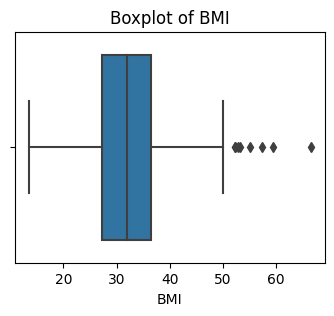

In [82]:
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['BMI'])
plt.title('Boxplot of BMI')
plt.show()

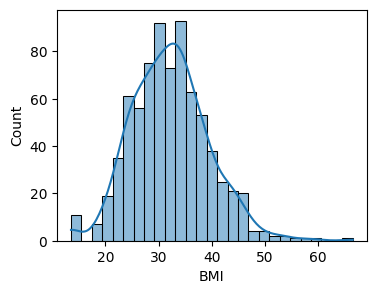

In [83]:
plt.figure(figsize=(4, 3))
sns.histplot(df['BMI'], kde=True)
plt.show()

In [84]:
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - (IQR * 1.5)
print('lower_limit:', lower_limit)
print('upper_limit:', upper_limit)
upper_limit = Q3 + (IQR * 1.5)
print(len(df[(df['BMI'] < lower_limit) | (df['BMI'] > upper_limit)]))
df[(df['BMI'] < lower_limit) | (df['BMI'] > upper_limit)]

lower_limit: 13.500000000000002
upper_limit: 50.3
8


Pregnancies  Glucose  BloodPressure  SkinThickness    Insulin   BMI  \
120            0      162             76           56.0  80.000000  53.2   
125            1       88             35           42.0  80.000000  55.0   
177            0      129            107           46.0  80.000000  66.5   
193           11      135             35           29.0  37.771768  52.3   
247            0      165             90           33.0  80.000000  52.3   
303            5      115             98           29.0  37.771768  52.9   
445            0      180             78           63.0  14.000000  59.4   
673            3      123            100           35.0  80.000000  57.3   

     DiabetesPedigreeFunction  Age  Outcome  
120                     0.759   25        1  
125                     0.496   26        1  
177                     0.319   26        1  
193                     0.578   40        1  
247                     0.427   23        0  
303                     0.209   28        1  
445                     2.420   25        1  
673                     0.880   22        0

In [85]:
len(df)

758

In [86]:
df = df.drop(index=[155])

In [87]:
len(df)

757

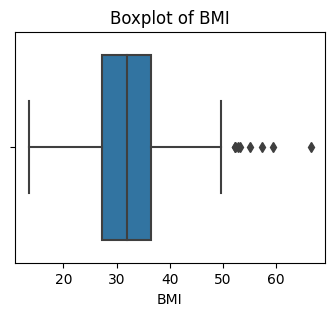

In [88]:
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['BMI'])
plt.title('Boxplot of BMI')
plt.show()

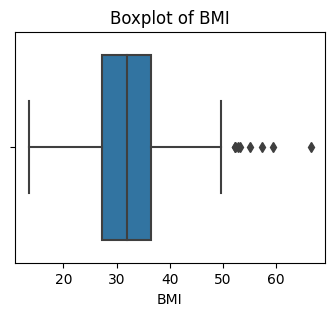

In [89]:
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['BMI'])
plt.title('Boxplot of BMI')
plt.show()

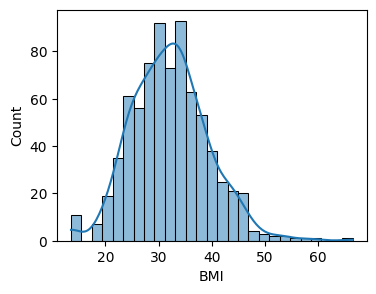

In [90]:
plt.figure(figsize=(4, 3))
sns.histplot(df['BMI'], kde=True)
plt.show()

##### DiabetesPedigreeFunction

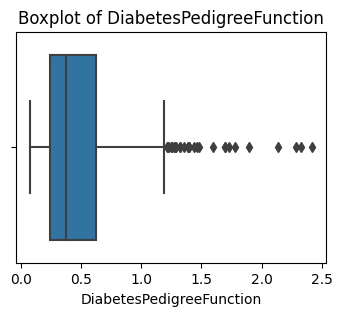

In [91]:
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['DiabetesPedigreeFunction'])
plt.title('Boxplot of DiabetesPedigreeFunction')
plt.show()

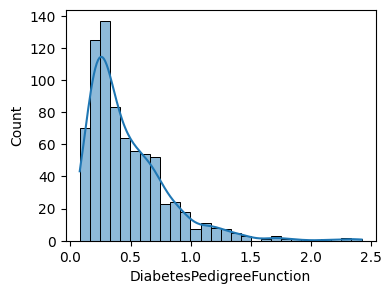

In [92]:
plt.figure(figsize=(4, 3))
sns.histplot(df['DiabetesPedigreeFunction'], kde=True)
plt.show()

In [93]:
Q1 = df['DiabetesPedigreeFunction'].quantile(0.25)
Q3 = df['DiabetesPedigreeFunction'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - (IQR * 1.5)
print('lower_limit:', lower_limit)
print('upper_limit:', upper_limit)
upper_limit = Q3 + (IQR * 1.5)
print(len(df[(df['DiabetesPedigreeFunction'] < lower_limit) | (df['DiabetesPedigreeFunction'] > upper_limit)]))
df[(df['DiabetesPedigreeFunction'] < lower_limit) | (df['DiabetesPedigreeFunction'] > upper_limit)]

lower_limit: -0.3305
upper_limit: 50.3
29


Pregnancies  Glucose  BloodPressure  SkinThickness    Insulin    BMI  \
4              0      137             40           35.0  80.000000  43.10   
12            10      139             80           29.0  37.771768  27.10   
39             4      111             72           47.0  80.000000  37.10   
45             0      180             66           39.0  37.771768  42.00   
58             0      146             82           29.0  37.771768  40.50   
100            1      163             72           29.0  37.771768  39.00   
147            2      106             64           35.0  80.000000  30.50   
187            1      128             98           41.0  58.000000  32.00   
218            5       85             74           22.0  37.771768  29.00   
228            4      197             70           39.0  80.000000  36.70   
243            6      119             50           22.0  80.000000  27.10   
245            9      184             85           15.0  37.771768  30.00   
259           11      155             76           28.0  80.000000  33.30   
292            2      128             78           37.0  80.000000  43.30   
308            0      128             68           19.0  80.000000  30.50   
330            8      118             72           19.0  37.771768  23.10   
370            3      173             82           48.0  80.000000  38.40   
371            0      118             64           23.0  80.000000  13.55   
383            1       90             62           18.0  59.000000  25.10   
395            2      127             58           24.0  80.000000  27.70   
445            0      180             78           63.0  14.000000  59.40   
534            1       77             56           30.0  56.000000  33.30   
593            2       82             52           22.0  80.000000  28.50   
606            1      181             78           42.0  80.000000  40.00   
618            9      112             82           24.0  37.771768  28.20   
621            2       92             76           20.0  37.771768  24.20   
622            6      183             94           29.0  37.771768  40.80   
659            3       80             82           31.0  70.000000  34.20   
661            1      199             76           43.0  37.771768  42.90   

     DiabetesPedigreeFunction  Age  Outcome  
4                       2.288   33        1  
12                      1.441   57        0  
39                      1.390   56        1  
45                      1.893   25        1  
58                      1.781   44        0  
100                     1.222   33        1  
147                     1.400   34        0  
187                     1.321   33        1  
218                     1.224   32        1  
228                     2.329   31        0  
243                     1.318   33        1  
245                     1.213   49        1  
259                     1.353   51        1  
292                     1.224   31        1  
308                     1.391   25        1  
330                     1.476   46        0  
370                     2.137   25        1  
371                     1.731   21        0  
383                     1.268   25        0  
395                     1.600   25        0  
445                     2.420   25        1  
534                     1.251   24        0  
593                     1.699   25        0  
606                     1.258   22        1  
618                     1.282   50        1  
621                     1.698   28        0  
622                     1.461   45        0  
659                     1.292   27        1  
661                     1.394   22        1

In [94]:
df['DiabetesPedigreeFunction'] = np.log(df['DiabetesPedigreeFunction'])
df['DiabetesPedigreeFunction'].skew()

0.11463670222350593

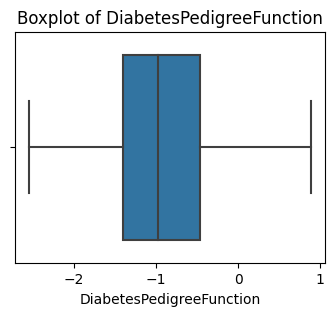

In [95]:
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['DiabetesPedigreeFunction'])
plt.title('Boxplot of DiabetesPedigreeFunction')
plt.show()

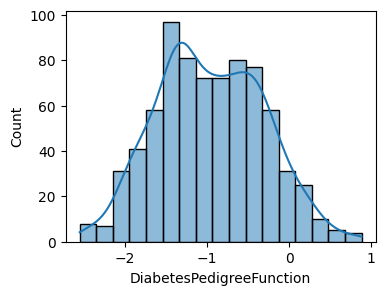

In [96]:
plt.figure(figsize=(4, 3))
sns.histplot(df['DiabetesPedigreeFunction'], kde=True)
plt.show()

##### Age

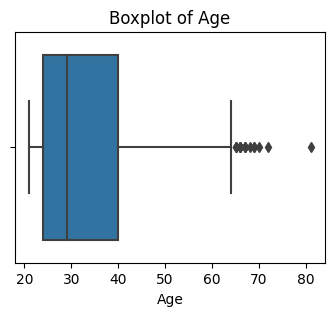

In [97]:
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.show()

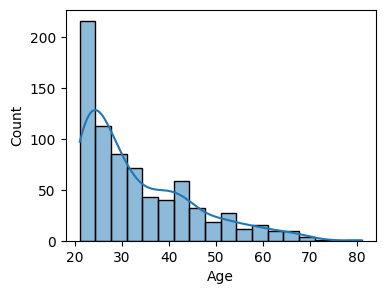

In [98]:
plt.figure(figsize=(4, 3))
sns.histplot(df['Age'], kde=True)
plt.show()

In [99]:
len(sorted(df['Age'].unique().tolist()))

52

In [100]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - (IQR * 1.5)
print('lower_limit:', lower_limit)
print('upper_limit:', upper_limit)
upper_limit = Q3 + (IQR * 1.5)
print(len(df[(df['Age'] < lower_limit) | (df['Age'] > upper_limit)]))
df[(df['Age'] < lower_limit) | (df['Age'] > upper_limit)]

lower_limit: 0.0
upper_limit: 1.2015
16


Pregnancies  Glucose  BloodPressure  SkinThickness    Insulin    BMI  \
123            5      132             80           29.0  37.771768  26.80   
148            5      147             78           29.0  37.771768  33.70   
221            2      158             90           29.0  37.771768  31.60   
294            0      161             50           29.0  37.771768  21.90   
362            5      103            107           37.0  37.771768  39.20   
363            4      146             78           29.0  37.771768  38.50   
453            2      119             35           29.0  37.771768  19.60   
459            9      134             74           33.0  60.000000  25.90   
489            8      194             80           29.0  37.771768  26.10   
495            6      166             74           29.0  37.771768  26.60   
537            0       57             60           29.0  37.771768  21.70   
552            6      114             88           29.0  37.771768  27.80   
666            4      145             82           18.0  37.771768  32.50   
674            8       91             82           29.0  37.771768  35.60   
684            5      136             82           29.0  37.771768  13.55   
759            6      190             92           29.0  37.771768  35.50   

     DiabetesPedigreeFunction  Age  Outcome  
123                 -1.682009   69        0  
148                 -1.523260   65        0  
221                 -0.216913   66        1  
294                 -1.370421   65        0  
362                 -1.187444   65        0  
363                 -0.653926   67        1  
453                 -0.183923   72        0  
459                 -0.776529   81        0  
489                 -0.596020   67        0  
495                 -1.190728   66        0  
537                 -0.307885   67        0  
552                 -1.398367   66        0  
666                 -1.448170   70        1  
674                 -0.532730   68        0  
684                 -0.446287   69        0  
759                 -1.280134   66        1

In [101]:
x = df[(df['Age'] < lower_limit) | (df['Age'] > upper_limit)]
print(sorted(x['Age']))
print(x['Age'].min())
print(x['Age'].max())

[65, 65, 65, 66, 66, 66, 66, 67, 67, 67, 68, 69, 69, 70, 72, 81]
65
81


In [102]:
df['Age'].clip(lower=0.0, upper=1.2015, inplace=True)

In [103]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - (IQR * 1.5)
print('lower_limit:', lower_limit)
print('upper_limit:', upper_limit)
upper_limit = Q3 + (IQR * 1.5)
print(len(df[(df['Age'] < lower_limit) | (df['Age'] > upper_limit)]))
df[(df['Age'] < lower_limit) | (df['Age'] > upper_limit)]

lower_limit: 1.2015
upper_limit: 64.0
0


Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

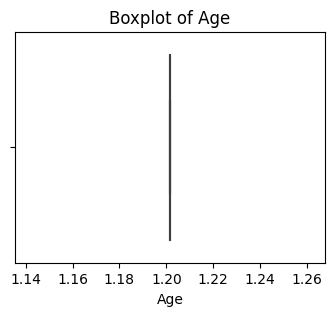

In [104]:
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.show()

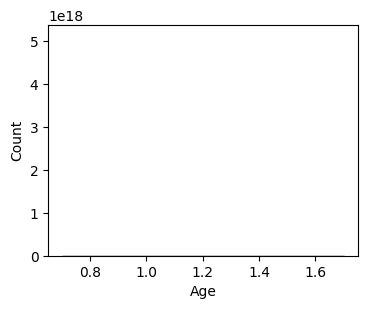

In [105]:
plt.figure(figsize=(4, 3))
sns.histplot(df['Age'], kde=True)
plt.show()

##### Outcome

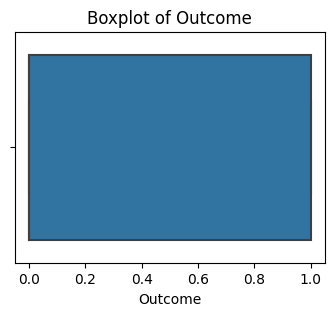

In [106]:
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['Outcome'])
plt.title('Boxplot of Outcome')
plt.show()

In [107]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

>
### Rebuild a Model
# Logistic Regression

In [108]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

Train = []
Test = []
CV = []

for i in range(0, 100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    model = LogisticRegression()
    model.fit(X_train, y_train)

    ypred_train = model.predict(X_train)
    ypred_test = model.predict(X_test)

    Train.append(model.score(X_train, y_train))
    # print('Train R2:', r2_score(y_train, ypred_train))
    Test.append(model.score(X_test, y_test))
    # print('Test R2:', r2_score(y_test, ypred_test))

    CV.append(cross_val_score(model, X_train, y_train, cv=5).mean())


em = pd.DataFrame({'Train':Train, 'Test':Test, 'CV':CV})
gm = em[(abs(em['Train']-em['Test']) <= 0.05) & (abs(em['Test']-em['CV']) <=0.05)]
print('best random state number:', gm[gm['Test']==gm['Test'].max()].index.to_list())

best random state number: [49]


In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)

In [111]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:, 1:8] = sc.fit_transform(X_train.iloc[:, 1:8])
X_test.iloc[:, 1:8] = sc.transform(X_test.iloc[:, 1:8])

In [112]:
y_test

766    1
403    0
394    1
610    0
31     1
      ..
343    0
346    0
421    0
326    1
597    0
Name: Outcome, Length: 152, dtype: int64

In [113]:
ypred_test

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [114]:
# Modeling
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(penalty='l2')
model1.fit(X_train, y_train)

LogisticRegression()

In [115]:
# prediction
ypred_train = model1.predict(X_train)
ypred_test = model1.predict(X_test)

# train accuracy
from sklearn.metrics import accuracy_score
print('Train Accuracy:', accuracy_score(y_train, ypred_train))

# CV Score
from sklearn.model_selection import cross_val_score
print('CV Score:', cross_val_score(model1, X_train, y_train, cv=5, scoring='accuracy').mean())

# test accuracy
print('Test Accuracy:', accuracy_score(y_test, ypred_test))

Train Accuracy: 0.7603305785123967
CV Score: 0.7603305785123966
Test Accuracy: 0.8157894736842105


In [116]:
ypred_train = model1.predict_proba(X_train)
ypred_train

array([[0.44698162, 0.55301838],
       [0.84541869, 0.15458131],
       [0.97004236, 0.02995764],
       ...,
       [0.93981755, 0.06018245],
       [0.4522038 , 0.5477962 ],
       [0.89591958, 0.10408042]])

In [117]:
(0.8157894736842105 - 0.8116883116883117) * 100

0.41011619958988277

### (0.8157894736842105 - 0.8116883116883117) * 100 = 0.41011619958988277

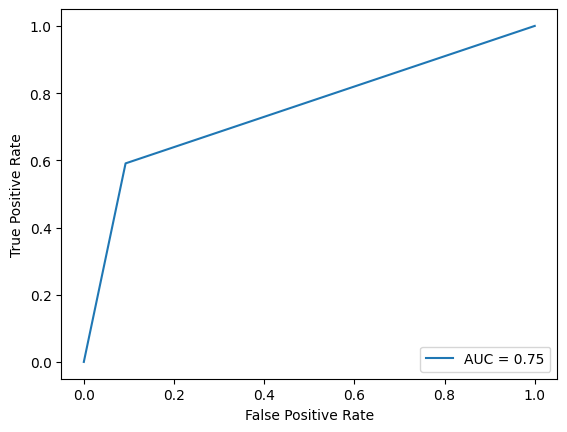

0.7491582491582491


In [118]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
fpr, tpr, thresolds = roc_curve(y_test, ypred_test)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.show()
print(roc_auc)

In [119]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, ypred_test)

0.7491582491582491

#### Confusion matrix

In [120]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypred_test)
cm

array([[98, 10],
       [18, 26]], dtype=int64)

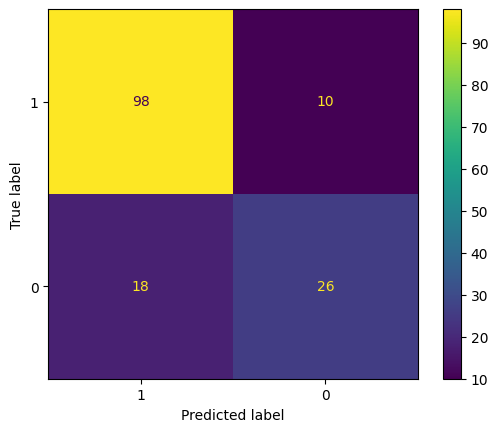

In [121]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm, display_labels=df['Outcome'].unique()).plot()
plt.show()

#### Classification Report

In [122]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88       108
           1       0.72      0.59      0.65        44

    accuracy                           0.82       152
   macro avg       0.78      0.75      0.76       152
weighted avg       0.81      0.82      0.81       152



# KNN Model

### Choosing best K value
### Hyperparameter Tuning for KNN Classifier

In [123]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier()
param_grid = {'n_neighbors' : list(range(1, 31)), 'p':[1, 2]}

full_cv_classifier = GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
full_cv_classifier.fit(X_train, y_train)
full_cv_classifier.best_params_

{'n_neighbors': 27, 'p': 2}

In [124]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=27, p=2)
knn_model.fit(X_train, y_train)

# Prediction
y_pred_train = knn_model.predict(X_train)
y_pred_test = knn_model.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn_model, X, y, cv=5)
print(scores)
print(scores.mean())

0.7371900826446282
0.8026315789473685
[0.73026316 0.69736842 0.78807947 0.7615894  0.7218543 ]
0.739830951551063


In [125]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_test)

array([[103,   5],
       [ 25,  19]], dtype=int64)

In [126]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       108
           1       0.79      0.43      0.56        44

    accuracy                           0.80       152
   macro avg       0.80      0.69      0.72       152
weighted avg       0.80      0.80      0.78       152



## Support Vector Machines (SVM)

In [127]:
# modelling
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Prediction
ypred_train = svm_model.predict(X_train)
ypred_test = svm_model.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, ypred_train))
print(accuracy_score(y_test, ypred_test))

0.7702479338842976
0.8092105263157895


### Hyperparameter tuning

In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
estimator = SVC()
param_grid = {'C' : [0.01, 0.1, 1, 10, 100], 'kernel':['rbf', 'linear',  'poly', 'signoid']}

full_cv_classifier = GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
full_cv_classifier.fit(X_train, y_train)
full_cv_classifier.best_params_

{'C': 0.01, 'kernel': 'linear'}

## Rebuild the SVM modelm with best parameters

In [129]:
# modelling
from sklearn.svm import SVC
svm_model2 = SVC(C=0.01, kernel='linear')
svm_model2.fit(X_train, y_train)

# Prediction
ypred_train = svm_model2.predict(X_train)
ypred_test = svm_model2.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, ypred_train))
print(accuracy_score(y_test, ypred_test))

0.7702479338842976
0.8157894736842105
